In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.csv', header=None, dtype=np.float64)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


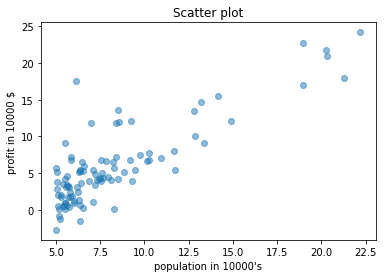

In [3]:
# Plot
plt.scatter(data[0], data[1], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()

In [4]:
def normalEquation(X, y):
    m = int(np.size(data[:, 1]))

    # This is the feature / parameter (2x2) vector that will
    # contain my minimized values
    theta = []

    # I create a bias_vector to add to my newly created X vector
    bias_vector = np.ones((m, 1))

    # I need to reshape my original X(m,) vector so that I can
    # manipulate it with my bias_vector; they need to share the same
    # dimensions.
    X = np.reshape(X, (m, 1))

    # I combine these two vectors together to get a (m, 2) matrix
    X = np.append(bias_vector, X, axis=1)

    # Normal Equation:
    # theta = inv(X^T * X) * X^T * y

    # For convenience I create a new, tranposed X matrix
    X_transpose = np.transpose(X)

    # Calculating theta
    theta = np.linalg.inv(X_transpose.dot(X))
    theta = theta.dot(X_transpose)
    theta = theta.dot(y)

    return theta

In [5]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values
print(X.shape)
print(y.shape)
data = data.iloc[:].values
print(data.shape)

(97,)
(97,)
(97, 2)


In [6]:
thetas = normalEquation(y, X)
thetas

array([4.72380549, 0.58844238])

In [7]:
#predict profit for 35,000
print(thetas[0]*3.5 + thetas[1])

#predict profit for 70,000
print(thetas[0]*7.0 + thetas[1])

17.121761588450145
33.65508079960169


In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Make predictions on 35,000 and 70,000
#y_pred = regr.predict(X_test.reshape(-1, 1))
y_pred = regr.predict(np.array([[3.5],[7.0]]))
y_pred

(72,)
(25,)
(72,)
(25,)


array([[0.12656419],
       [4.35928889]])

In [9]:
# The parameters
print('thetas: \n', regr.coef_, regr.intercept_)

thetas: 
 [[1.20934991]] [-4.10616051]


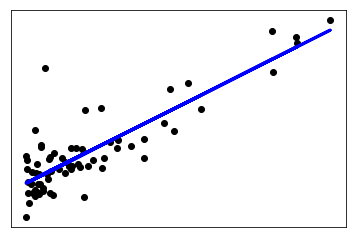

In [10]:
# Plot [train]
y_pred = regr.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

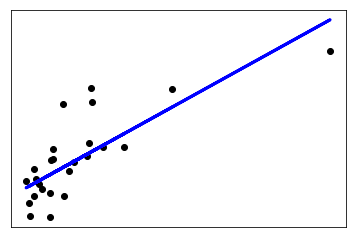

In [11]:
# Plot [test]
y_pred = regr.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [13]:
data = pd.read_csv('ex1data1.csv', header=None, dtype=np.float64)

In [14]:
X = np.array(data[0]).reshape(97, 1)
y = np.array(data[1]).reshape(97, 1)
print(X.shape)
print(y.shape)

(97, 1)
(97, 1)


In [15]:
X_b = np.c_[np.ones((97,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[-3.89578088]
 [ 1.19303364]]


In [16]:
X_new = np.array([[3.5],[4.0]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[0.27983688],
       [0.8763537 ]])

In [17]:
X.shape

(97, 1)

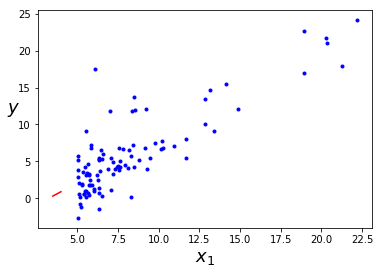

In [18]:
plt.plot(X,y,'b.')
plt.plot(X_new, y_predict,'r-')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.show()

In [19]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [20]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [21]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -2.961,
Theta1:          1.099
Final cost/MSE:  42872.278


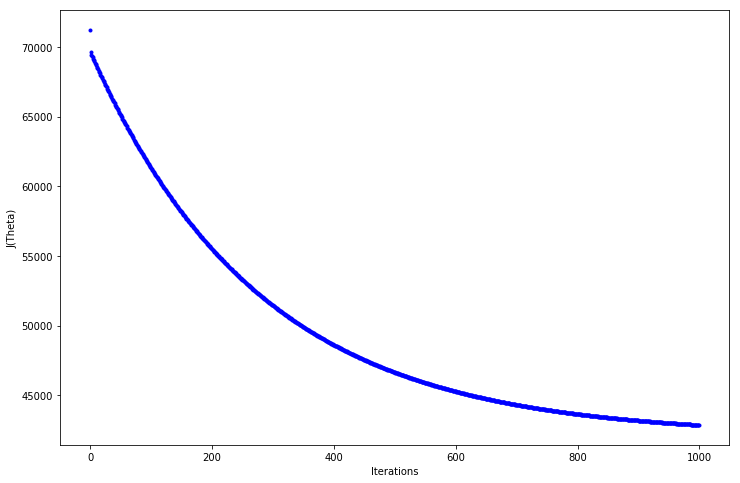

In [22]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

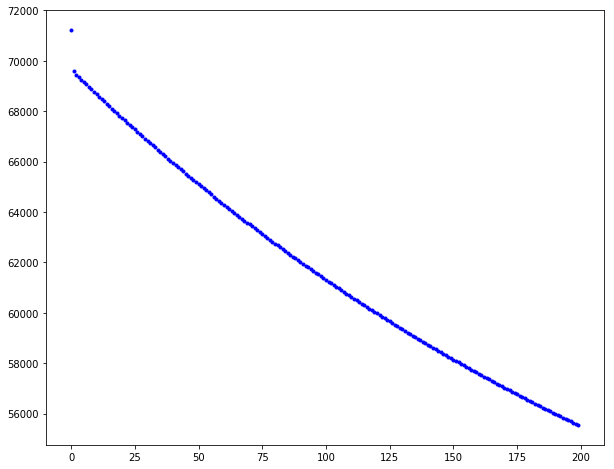

In [23]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

In [24]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

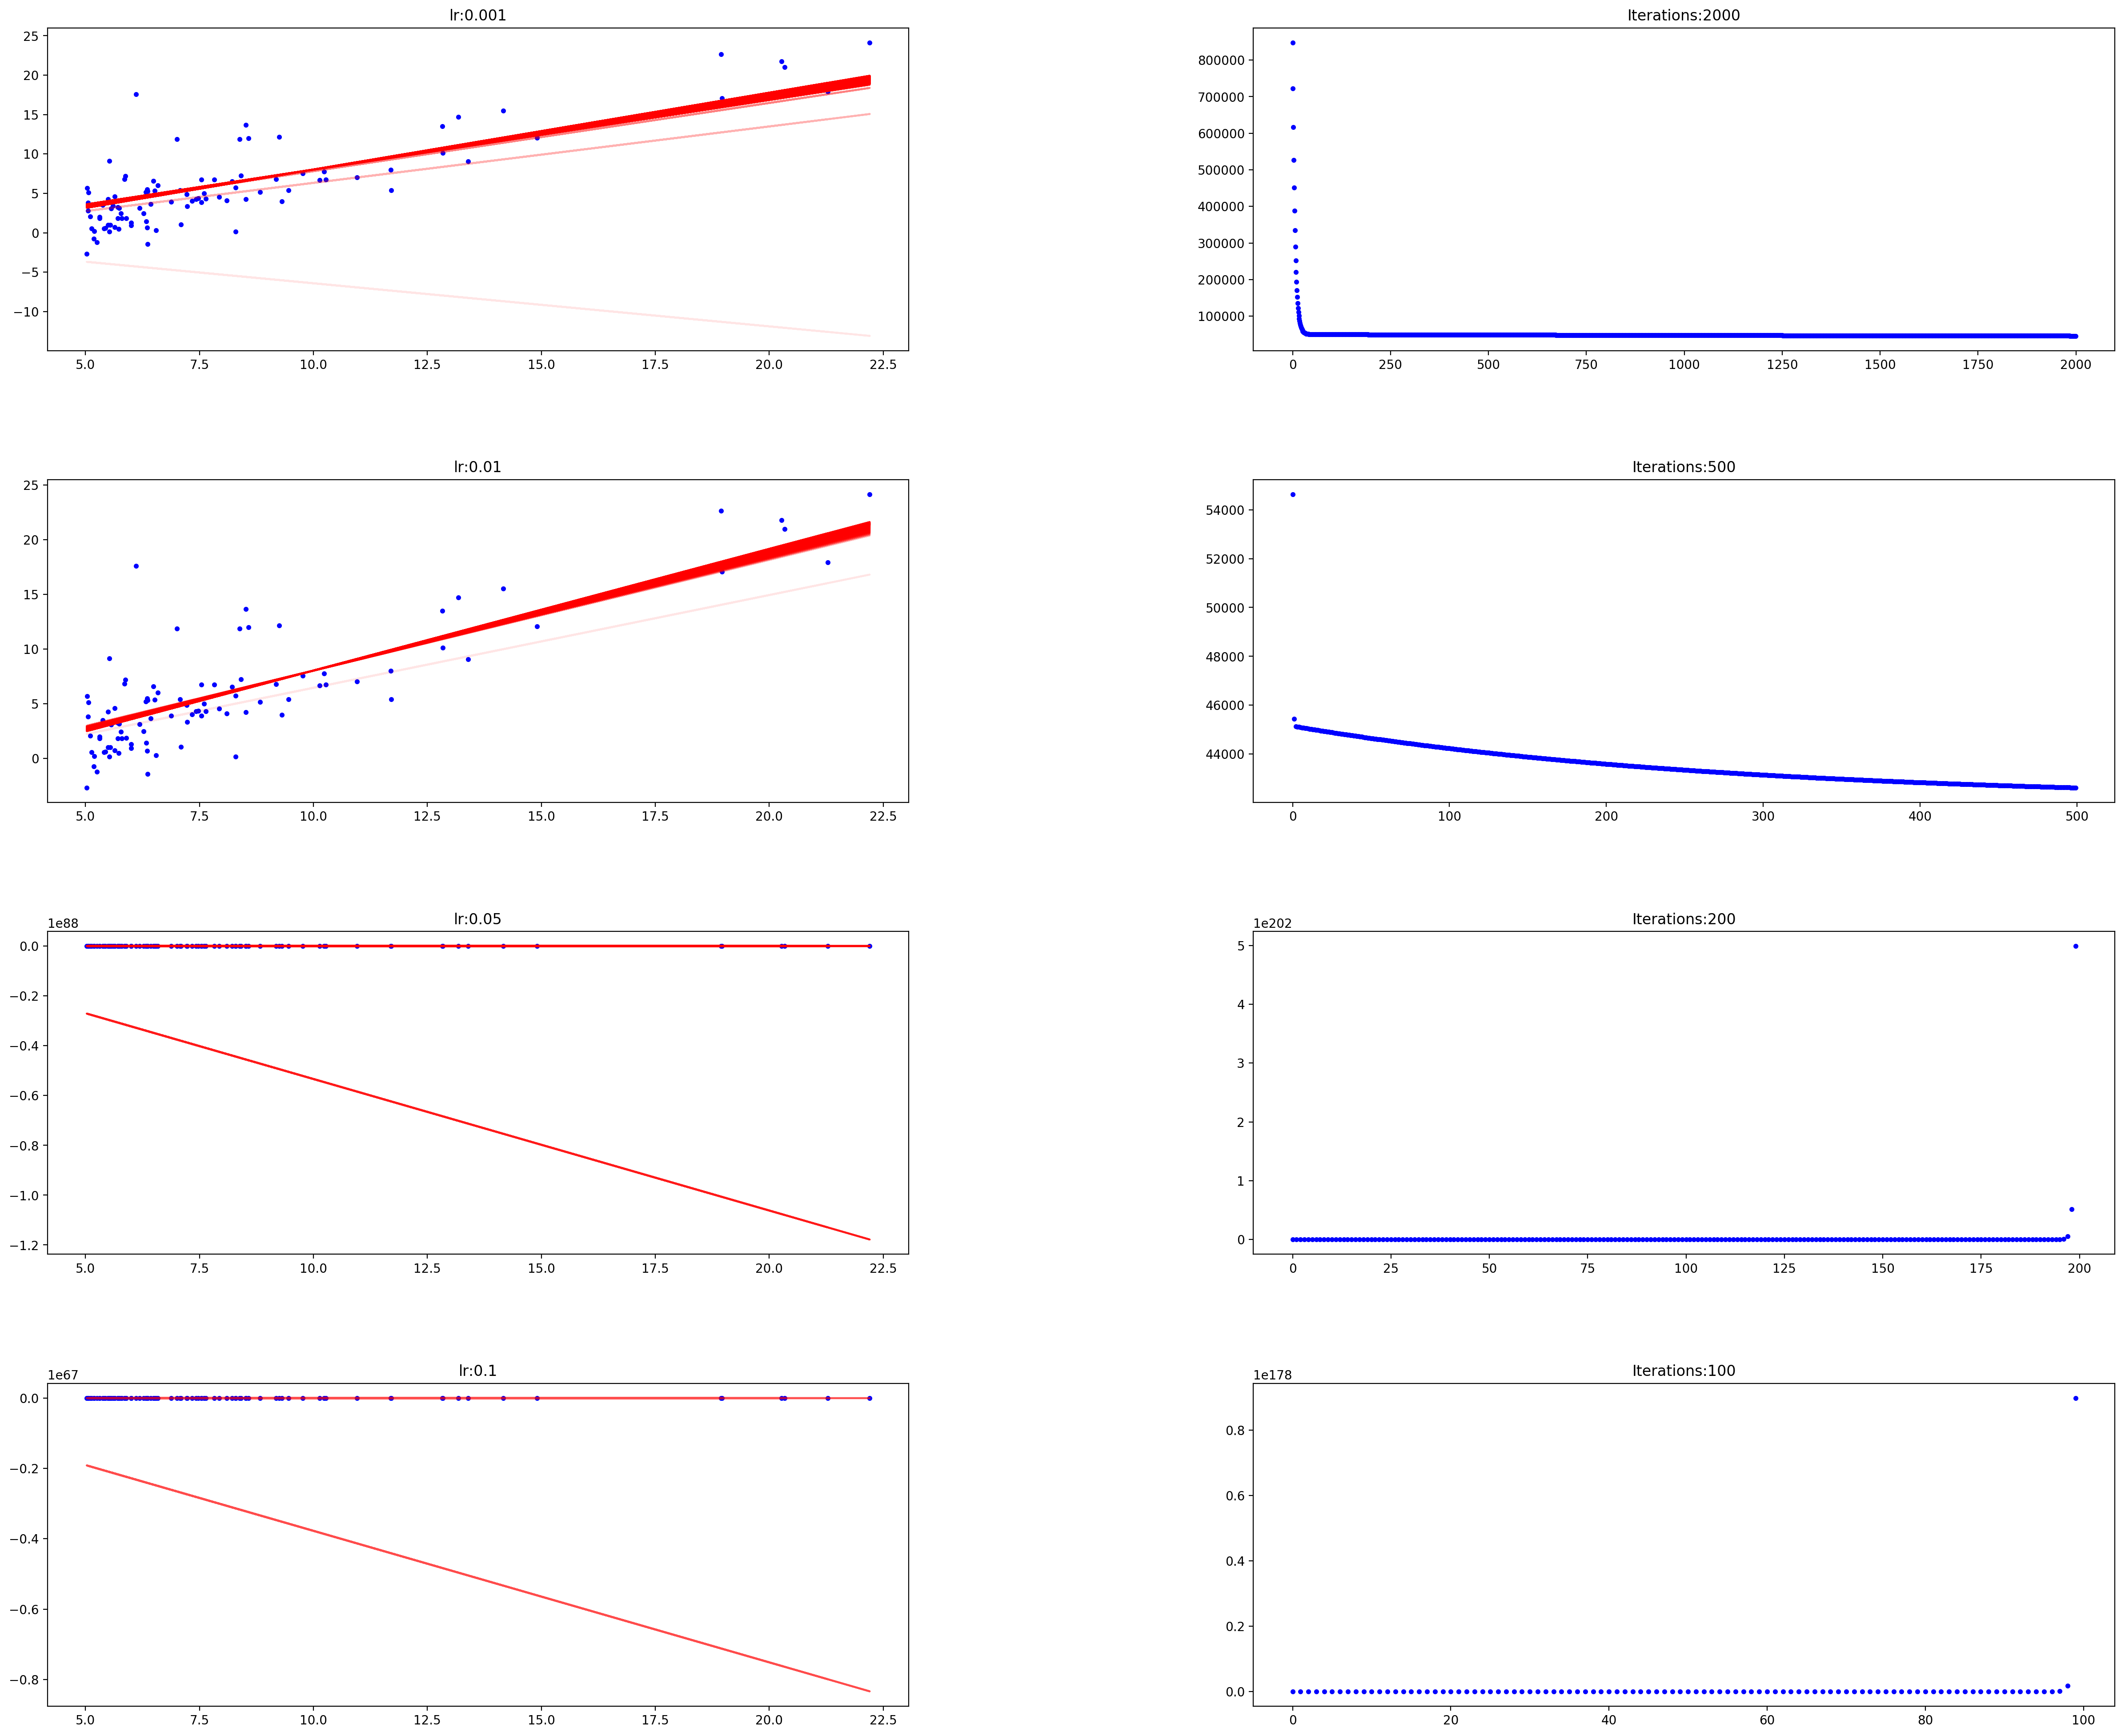

In [25]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

In [26]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [27]:
lr =0.001
n_iter = 100

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.262,
Theta1:          0.787
Final cost/MSE:  494.030


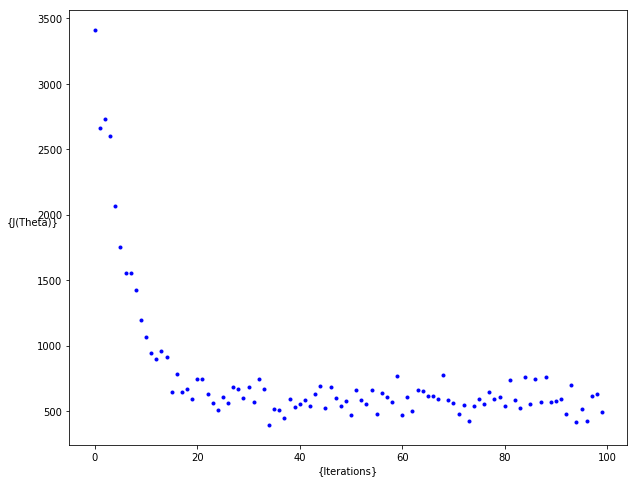

In [28]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [29]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [30]:
lr =0.001
n_iter = 100

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.954,
Theta1:          0.706
Final cost/MSE:  12411.502


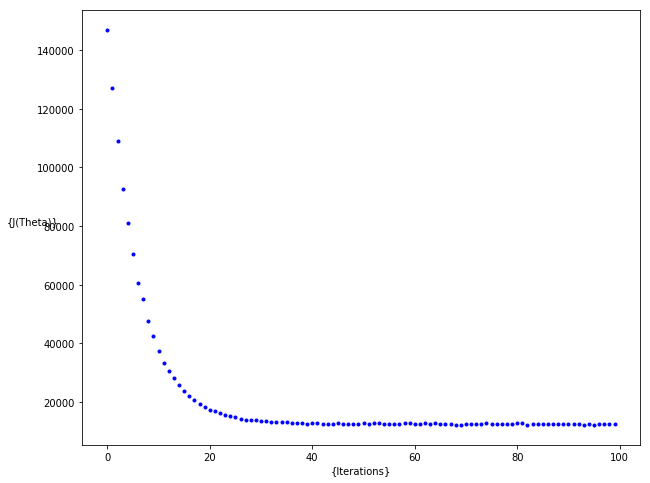

In [31]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')